<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/Coronav%C3%ADrus_no_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by [jonhselmo](https://jonhselmo.com.br)

# COVID 19

Desde janeiro de 2020, a crescente proliferação do novo Coronavírus transformou-se em um dos maiores desafios da humanidade, transformou-se em uma pandemia.

De acordo com a Organização Mundial de Saúde, Pandemia é um termo usado para uma determinada doença que rapidamente se espalhou por diversas partes de diversas regiões (continental ou mundial) através de uma contaminação sustentada. Neste quesito, a gravidade da doença não é determinante e sim o seu poder de contágio e sua proliferação geográfica. Porém, a pandemia em que vivemos é causada por uma doença grave, a COVID 19.

A COVID-19 é uma doença causada por um vírus da família dos coronavírus e provoca sintomas como febre, tosse e dificuldade respiratória. 

Transmitida de uma pessoa para outra por meio de gotículas respiratórias, a doença pode ser prevenida por meio da lavagem das mãos e evitando-se aglomerações. Até o momento, não existem tratamentos para a enfermidade, a qual pode levar à morte, principalmente de idosos e pessoas com problemas de saúde, como hipertensão e doenças cardiovasculares.

A COVID-19 ainda é uma doença nova e, portanto, há uma busca constante por informações sobre ela. Assim sendo, dados novos serão inseridos neste texto à medida que as descobertas ocorrerem.

Os primeiros casos da doença surgiram no final do ano de 2019, na China. No primeiro semestre de 2020, a doença já havia atingindo todos os continentes, ganhando o status de PANDEMIA.



#DADOS

Os dados utilizados são provenientes do repositório go GitHub da organização OWID - OUR WORLD IN DATA - https://ourworldindata.org/.

Link do diretório - [OIWD](https://github.com/owid/covid-19-data/tree/master/public/data), com atualização até 26/06/2020.

Ressalto que será realizado apenas análise dos dados do dataset, de onde serão extraídos alguns insights quantitativos. Os dados provenientes são coletados do mundo inteiro, o que nos leva a dificuladades de coleta e falta de padronização de protocolos.

## Dicionário de dados

Ao se analisar datasets públicos é fundamental disponibilizar o dicionário de dados. Ele é fundamental para o entendimento dos dados.

Abaixo montei o dicionário.

Column|Description|Source
------|-----------|------
`iso_code`| ISO 3166-1 alpha-3 – three-letter country codes|International Organization for Standardization
`continent`|Continent of the geographical location|Our World in Data
`location`|Geographical location|Our World in Data
`date`|Date of observation|Our World in Data
`total_cases`|Total confirmed cases of COVID-19|European Centre for Disease Prevention and Control
`new_cases`|New confirmed cases of COVID-19|European Centre for Disease Prevention and Control
`total_deaths`|Total deaths attributed to COVID-19|European Centre for Disease Prevention and Control
`new_deaths`|New deaths attributed to COVID-19|European Centre for Disease Prevention and Control
`total_cases_per_million`|Total confirmed cases of COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`new_cases_per_million`|New confirmed cases of COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`total_deaths_per_million`|Total deaths attributed to COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`new_deaths_per_million`|New deaths attributed to COVID-19 per 1,000,000 people|European Centre for Disease Prevention and Control
`total_tests`|Total tests for COVID-19|National government reports
`new_tests`|New tests for COVID-19|National government reports
`new_tests_smoothed`| New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window|National government reports
`total_tests_per_thousand`|Total tests for COVID-19 per 1,000 people|National government reports
`new_tests_per_thousand`|New tests for COVID-19 per 1,000 people|National government reports
`new_tests_smoothed_per_thousand`|New tests for COVID-19 (7-day smoothed) per 1,000 people|National government reports
`tests_units`|Units used by the location to report its testing data|National government reports
`stringency_index`|Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)|Oxford COVID-19 Government Response Tracker, Blavatnik School of Government
`population`|Population in 2020|United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects: The 2019 Revision
`population_density`|Number of people divided by land area, measured in square kilometers, most recent year available|World Bank – World Development Indicators, sourced from Food and Agriculture Organization and World Bank estimates
`median_age`|Median age of the population, UN projection for 2020|UN Population Division, World Population Prospects, 2017 Revision
`aged_65_older`|Share of the population that is 65 years and older, most recent year available|World Bank – World Development Indicators, based on age/sex distributions of United Nations Population Division's World Population Prospects: 2017 Revision
`aged_70_older`|Share of the population that is 70 years and older in 2015|United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects: The 2017 Revision
`gdp_per_capita`|Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available|World Bank – World Development Indicators, source from World Bank, International Comparison Program database
`extreme_poverty`|Share of the population living in extreme poverty, most recent year available since 2010|World Bank – World Development Indicators, sourced from World Bank Development Research Group
`cvd_death_rate`|Death rate from cardiovascular disease in 2017|Global Burden of Disease Collaborative Network, Global Burden of Disease Study 2017 Results
`diabetes_prevalence`|Diabetes prevalence (% of population aged 20 to 79) in 2017|World Bank – World Development Indicators, sourced from International Diabetes Federation, Diabetes Atlas
`female_smokers`|Share of women who smoke, most recent year available|World Bank – World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository
`male_smokers`|Share of men who smoke, most recent year available|World Bank – World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository
`handwashing_facilities`|Share of the population with basic handwashing facilities on premises, most recent year available|United Nations Statistics Division
`hospital_beds_per_thousand`|Hospital beds per 1,000 people, most recent year available since 2010|OECD, Eurostat, World Bank, national government records and other sources
`life_expectancy`|Life expectancy at birth in 2019|James C. Riley, Clio Infra, United Nations Population Division

## Importando os dados para análise

Como primeiro passo, temos que definir o caminho para o dados.

In [1]:
#caminho do dataset
DATA_PATH = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

Importar as bibliotecas necessárias para as análises.



In [2]:
#importe das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


E transformar os dados em um DataFrame.
 * `DataFrame` - É uma estrutura bidimensional (semelhante a uma planilha) que traz agilidade na manipulação dos dados. O DataFrame é composo por *Series*, que são estruturas unidimensionais que suportam variados tipos de dados (string, interger, float, datetime).

 Podemos, a partir de agora, chamar o DataFrame de `DF`.

In [3]:
#definir o DF
df_covid19 = pd.read_csv(DATA_PATH)

Pronto. Já temos o DF criado. Agora já estamos aptos a realizar as primeiras análises.

# EDA - ANÁLISE EXPLORATÓRIA DE DADOS

A  análise exploratória de dados ou EDA (Exploraty Data Analysis) é uma técnica de grande importância, pois nos permite conhecer melhor os dados, obtendo informações relevantes, como o valore máximo de uma coluna/variável, mínimo, moda, média, mediana,  quartis, amplitude, variância, desvio padrão, dentre outras.

A partir da EDA, também podemos realizar análises visuais, gerando insights em gráfico de barras, gráfico de setores, histograma, boxplot, gráfico de linha (sequência), polígono de frequências, diagrama de dispersão e muitos outros.



##Visualização do DF

De início, vamos visualizar as 05 primeiras e as 05 últimas entradas do DF criado.

In [4]:
#primeiros registros do DF
df_covid19.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
#últimos registros do DF criado
df_covid19.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
26744,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26745,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26746,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26747,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26748,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em uma rápida olhada nessas 10 linhas, já podemos perceber que o conjunto de dados possui muitos valores ausentes, muitas colunas com valores numéricos decimais (podemos utilizar abordagens estatísticas), informação de locais (podemos usar os dados para plotar mapas).



##Composição do DF



### Dimensões

Visualizaremos o tamanho ou forma do DF.

In [6]:
#tamanho do DF
print('Quantidade de linhas : {}'.format(df_covid19.shape[0]))
print('Quantidade colunas   : {}'.format(df_covid19.shape[1]))

Quantidade de linhas : 26749
Quantidade colunas   : 34


###Colunas

Vimos que o DF possui 34 colunas. Com a instrução abaixo podemos extrair os nomes dessas colunas.

In [7]:
#nome das colunas
df_covid19.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Como já criamos o dicionário de dados, podemos recorrer a ele para tentarmos entender mais profundamente cada coluna.

### Tipos de dados

Outro passo importante é conhecer os tipos de dados de cada coluna, para assim promovermos as adequações que se apresentarem necessárias.


In [8]:
#tipos de dados
df_covid19.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Vimos que o DF é composto por elementos dos tipos:
* `object` - Que se tratam de textos;
* `float64` - Números decimais.



> Como falado mais em cima, teremos que realizar a adequação da coluna `date`. Ela se apresenta como object, quando deveria ser do tipo data (datetime).




In [9]:
#adequar o tipo da coluna 'date'
df_covid19['date'] = pd.to_datetime(df_covid19['date'])

In [10]:
#Verificar se as modificações surtiram efeito
df_covid19.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


Pronto! Tudo certo com nossos tipos de dados.


### Valores ausentes

Lembram do primeiro manuseio que realizamos no DF?

Lá, visualizamos o DF e fizemos nossa primeira inspeção dos dados. Ao analisar aquelas poucas linhas, rapidamente percebemos uma grande quantidade de valores ausentes.

Se fossemos considerar apenas esse ponto, já poderíamos perceber a importância da EDA, pois o tratamento correto dos dados faltantes afeta diretamente o desempenho de análises mais complexas, como a aplicação de técnicas de regressão ou de modelos de aprendizagem de máquina.



O método `insull` nos retorna valores boleano:
* `True` - Quando encontra valores ausentes;
* `False` - Quando existem valores.

In [11]:
#valores ausentes
df_covid19.isnull()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26744,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
26745,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
26746,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
26747,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Mas observar uma tabela com todos esses `True` e `False` não nos diz muita coisa. 

Devemos agrupá-los.

Podemos utlizar o método `sum()` para somar os True e obtermos os totais.

In [12]:
#totais de valores ausentes
df_covid19.isnull().sum().sort_values(ascending=False)

new_tests                          19901
new_tests_per_thousand             19901
total_tests_per_thousand           19226
total_tests                        19226
new_tests_smoothed_per_thousand    18611
new_tests_smoothed                 18611
tests_units                        17992
handwashing_facilities             15847
extreme_poverty                    10782
male_smokers                        7587
female_smokers                      7363
stringency_index                    5379
hospital_beds_per_thousand          4631
aged_65_older                       2925
gdp_per_capita                      2857
aged_70_older                       2707
median_age                          2583
cvd_death_rate                      2553
diabetes_prevalence                 1769
population_density                  1165
life_expectancy                      371
new_deaths_per_million               279
total_deaths_per_million             279
new_cases_per_million                279
total_cases_per_

Podemos notar aque apenas `location` e `date` possuem todos os valores preenchidos.

Agora vamos mostrar esses totais em forma porcentual.

In [13]:
#apresentar valores nulos de forma percentual
#for i in df_covid19.columns:
(df_covid19.isnull().sum() / df_covid19.shape[0]).sort_values(ascending=False)

new_tests                          0.743990
new_tests_per_thousand             0.743990
total_tests_per_thousand           0.718756
total_tests                        0.718756
new_tests_smoothed_per_thousand    0.695764
new_tests_smoothed                 0.695764
tests_units                        0.672623
handwashing_facilities             0.592433
extreme_poverty                    0.403080
male_smokers                       0.283637
female_smokers                     0.275263
stringency_index                   0.201092
hospital_beds_per_thousand         0.173128
aged_65_older                      0.109350
gdp_per_capita                     0.106808
aged_70_older                      0.101200
median_age                         0.096564
cvd_death_rate                     0.095443
diabetes_prevalence                0.066133
population_density                 0.043553
life_expectancy                    0.013870
new_deaths_per_million             0.010430
total_deaths_per_million        

As colunas abaixos possuem os maiores percentuais de dados ausentes:
```
* total_tests               - 0,714%
* new_tests                 - 0,740%
* total_tests_per_thousand  - 0,714%
* new_tests_per_thousand    - 0,740%
```

Dependendo da abordagem da análise, podemos optar por retirar esses registros ausentes, como também, podemos imputar dados a partir de métrica estatística ou mesmo substituir por algum valor definido por uma regra de negócio.

#Visualização

Vamos retirar alguns insights dos dados e apresentá-los de forma gŕafica.

## Covid no mundo

Qual o último total de casos acumulados no mundo da covid19?

Analisando o DF percbemos que eles apresentam subtotais diários, na localização 'world'. Então basta filtrarmos o DF a partir desses parâmetros.

In [14]:
#filtrar as colunas a partir da localidade 'world'
df_covid19.loc[df_covid19.location == 'World']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
26504,OWID_WRL,NaN,World,2019-12-31,27.0,27.0,0.0,0.0,0.003,0.003,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26505,OWID_WRL,NaN,World,2020-01-01,27.0,0.0,0.0,0.0,0.003,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26506,OWID_WRL,NaN,World,2020-01-02,27.0,0.0,0.0,0.0,0.003,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26507,OWID_WRL,NaN,World,2020-01-03,44.0,17.0,0.0,0.0,0.006,0.002,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26508,OWID_WRL,NaN,World,2020-01-04,44.0,0.0,0.0,0.0,0.006,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26680,OWID_WRL,NaN,World,2020-06-24,9229573.0,165799.0,477285.0,5577.0,1184.068,21.270,61.231,0.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26681,OWID_WRL,NaN,World,2020-06-25,9400810.0,171237.0,482479.0,5194.0,1206.036,21.968,61.898,0.666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26682,OWID_WRL,NaN,World,2020-06-26,9582321.0,181511.0,489195.0,6716.0,1229.322,23.286,62.759,0.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58
26683,OWID_WRL,NaN,World,2020-06-27,9771518.0,189197.0,493896.0,4701.0,1253.595,24.272,63.362,0.603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58


Vamos criar uma rotina para selecionar os mais recentes valores da coluna 'total_cases' e 'total_deaths'.

In [15]:
#filtramos as datas e total de casos para a localidade 'World'
df_covid19.loc[df_covid19.location == 'World'][ ['date','total_cases',  'total_deaths']]
                                                                                                                                    

,date,total_cases,total_deaths
26504,2019-12-31,27.0,0.0
26505,2020-01-01,27.0,0.0
26506,2020-01-02,27.0,0.0
26507,2020-01-03,44.0,0.0
26508,2020-01-04,44.0,0.0
...,...,...,...
26680,2020-06-24,9229573.0,477285.0
26681,2020-06-25,9400810.0,482479.0
26682,2020-06-26,9582321.0,489195.0
26683,2020-06-27,9771518.0,493896.0


Definiremos dois DF para realizarmos nossas manipulações de dados.

In [16]:
total_world = df_covid19.loc[df_covid19.location == 'World'][ ['date','total_cases']]
total_deathw= df_covid19.loc[df_covid19.location == 'World'][ ['date','total_deaths']]


Importaremos mais algumas bibliotecas.

In [17]:
import matplotlib.dates as mdates
import datetime as dt
from datetime import timedelta, date


Pronto! Agora vamos montar nosso gráfico automatizado com os valores mais atuais de 'total_cases' e 'total_deaths'.

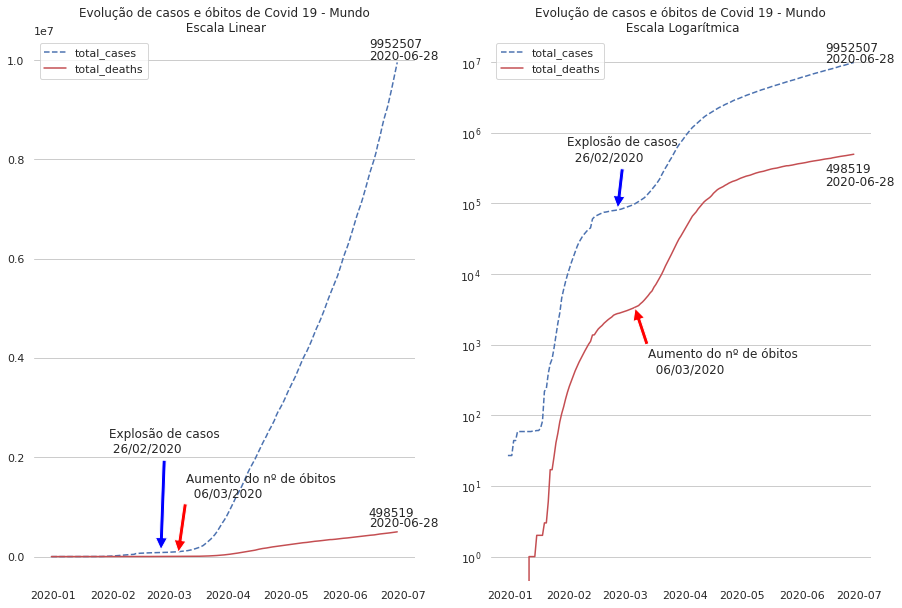

In [204]:
#criar gráfico

#Definir a última data do dataset
data_max = df_covid19['date'].max().date()

#parametros de adequação para as anotações no gráfico - quantitativos
x_grafico = data_max - timedelta(20)
x = [x_grafico, data_max]

#últimos quantitativos para o total_case e total_deaths no dataset
y_tc = int(df_covid19.loc[(df_covid19['date'] == str(data_max)) & (df_covid19['location'] == 'World')]['total_cases'])
y_td = int(df_covid19.loc[(df_covid19['date'] == str(data_max)) & (df_covid19['location'] == 'World')]['total_deaths'])

#configurações do gráfico
#sns.set_style='whitegrid'
sns.set(font='arial', style='whitegrid')

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(15,10))



#Gŕafico 01
ax[0].plot_date('date', 'total_cases', 'b--', data= total_world)
ax[0].plot_date('date', 'total_deaths', 'r', data = total_deathw)
ax[0].set_yscale('linear')
ax[0].set_title( 'Evolução de casos e óbitos de Covid 19 - Mundo\n Escala Linear')
ax[0].legend()

#anotação e seta
ax[0].annotate('Explosão de casos\n 26/02/2020', xy=(dt.datetime(2020,2 , 26), 9e4), xytext=(dt.datetime(2020,1 , 30), 2.1e6),
            arrowprops=dict(facecolor='blue', shrink=0.025))

ax[0].annotate('Aumento do nº de óbitos\n  06/03/2020', xy=(dt.datetime(2020,3 , 6), 6e4), xytext=(dt.datetime(2020,3 , 10), 1.2e6),
            arrowprops=dict(facecolor='red', shrink=0.025))
#total_cases
ax[0].annotate(y_tc, (mdates.date2num(x[0]), y_tc+1e5),  
            xytext=(10,10), textcoords='offset points')

ax[0].annotate(str(x[1]), (mdates.date2num(x[0]), y_tc-1.5e5),  
            xytext=(10,10), textcoords='offset points')

#total_deaths
ax[0].annotate(y_td, (mdates.date2num(x[0]), y_td+1e5),
            xytext=(10,10), textcoords='offset points')

ax[0].annotate(str(x[1]), (mdates.date2num(x[0]), y_td-1e5),  
            xytext=(10,10), textcoords='offset points')

ax[0].grid(axis='x')

#Gŕafico 02
ax[1].plot_date('date', 'total_cases', 'b--', data= total_world)
ax[1].plot_date('date', 'total_deaths', 'r', data = total_deathw)
ax[1].set_yscale('log')
ax[1].set_title( 'Evolução de casos e óbitos de Covid 19 - Mundo\n Escala Logarítmica')

ax[1].legend()

#anotação e seta
ax[1].annotate('Explosão de casos\n  26/02/2020', xy=(dt.datetime(2020,2 , 26), 8e4), xytext=(dt.datetime(2020,1 , 31), 4e5),
            arrowprops=dict(facecolor='blue', shrink=0.05))

ax[1].annotate('Aumento do nº de óbitos\n  06/03/2020', xy=(dt.datetime(2020,3 , 6), 3.4e3), xytext=(dt.datetime(2020,3 , 13), 4e2),
            arrowprops=dict(facecolor='red', shrink=0.025))
#total_cases
ax[1].annotate(y_tc, (mdates.date2num(x[0]), y_tc+2e5),  
            xytext=(10,10), textcoords='offset points')

ax[1].annotate(str(x[1]), (mdates.date2num(x[0]), y_tc-2.8e6),  
            xytext=(10,10), textcoords='offset points')

#total_deaths
ax[1].annotate(y_td, (mdates.date2num(x[0]), y_td-3e5),
            xytext=(10,10), textcoords='offset points')

ax[1].annotate(str(x[1]), (mdates.date2num(x[0]), y_td-3.7e5),  
            xytext=(10,10), textcoords='offset points')

ax[1].grid(axis='x')


#retira os eixos da grade que cirunda o gráfico
sns.despine(left=True, bottom=True)

plt.show()

fig.savefig('covid mundo.png', format='png', dpi=300)


A partir do gráfico podemos notar que a explosão de casos de Covid19 no mundo ocorreu no final de março/2020, quando os totais ainda estavam na casa das dezenas de milhares. No último registro apresentado no gráfico, um pouco mais de 03 meses depois, o total de casos está perto de chegar na casa dos 8 dígitos ou 10.000.000 (escala limite do gŕafico - $1e7$ ou $10^7$).

No dia 26/02/2020, onde o gráfico mostra o início do aumento descontralo de casos, temos o primeiro registro comprovado de disseminção comunitária, quando o Centro de Detenção de Doenças dos EUA divulga o primeiro registro de pessoa com o vírus que não teve contato com outros infectados ou fez viagens internacionais.

Tomamos dois pontos para análise, um no dia 26/02/2020 e outro no dia 06/03/2020. No primeiro ponto temos o início da transmissão coletiva do vírus. No segundo, o crescimento do número de vítimas fatais (alguns dias após a confirmação do início da transmissão comunitária. No gráfico de escala linear, essas constatações não se mostram muito claras, então plotamos os mesmos dados em escala logarítmica, onde podemos observar que os pontos de inflexão (quando a curva muda o sentido) coincidem com as análises.




# Os 05 países com maior número de mortes por Covid-19

O código abaixo foi montado para apresentar os 05 países com o maior número de mortes ocasionadas por Covid19.

Constata-se que os Estados Unidos foi a nação que mais sofreu perdas, e que nosso país já amarga, o também sofrido, 2º lugar!

A representação gráfica foi configurada para, a cada execução do código,  apresentar os dados mais atuais do dataset. 

In [42]:
#filtros dos países com maior número de mortes.
last_date_dataset = str(df_covid19['date'].max().date())
top5 = df_covid19.loc[df_covid19.date == last_date_dataset, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]


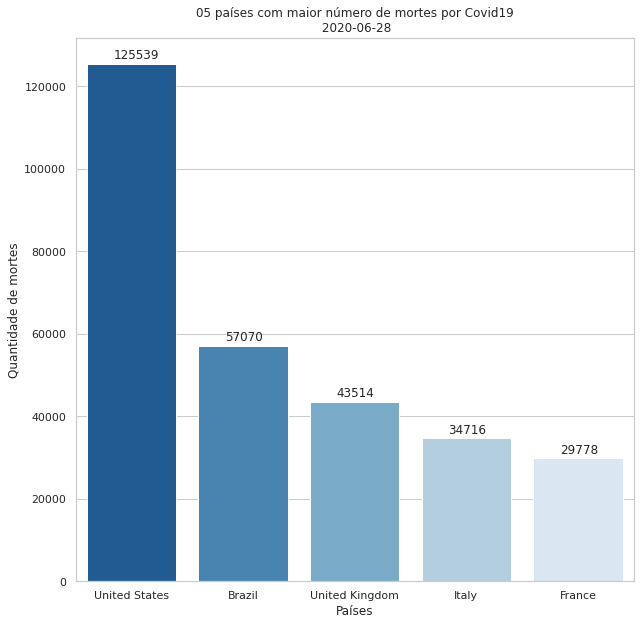

In [205]:
sns.set_style='whitegrid'
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot('location', 'total_deaths', palette='Blues_r', data= top5)
ax.set_title( '05 países com maior número de mortes por Covid19\n {}'.format(str(df_covid19['date'].max().date())))
ax.set_xlabel('Países')
ax.set_ylabel('Quantidade de mortes')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(-18,5), textcoords='offset points' )
    
plt.show()

fig.savefig('top5mundo.png', format='png', dpi=300)

##Brasil

Abaixo é apresentado o gráfico com a evoulução dos casos do novo Coronavírus e os óbitos registrados no Brasil.

No dia 26/02/2020 o Brasil registrou o primeiro caso de Covid19. Os casos subsequentes só serão registrados alguns dias depois, como mostrado pelo 'degrau' formado no gŕafico em representação logarítimica. Já o primeiro óbito é sensibilizado no dia 17/03/2020, quando o país já registrava 234 casos.


A partir do dia 24/03/2020 o gráfico mostra desaceleração no crescimento de casos de Covid19 no Brasil, análise que coincide com o anúncio do isolamento soclial no Estado de São Paulo, maior centro de incidência de casos no país. Em ralação aos óbitos, uma maior desaceleração é percebida a partir do dia 04/04/2020, dia do anúncio da aquisição de mais 15 mil respiradores adquiridos pelo Ministério da Saúde, elevando em quase 25% a quantidade de respiradores no sistema de saúde nacional.

In [203]:
#df_covid19.loc[(df_covid19['date']=='2020-03-17') & (df_covid19['location']=='Brazil'), ['total_cases']]

In [137]:
#total de casos no Brasil
total_brasil = df_covid19.loc[df_covid19.location == 'Brazil'][ ['date','total_cases']]

#total de mortes no Brasil
total_deathB= df_covid19.loc[df_covid19.location == 'Brazil'][ ['date','total_deaths']]

#data do primeiro caso de Covid19 no Brasil
date_case_br = df_covid19.loc[(df_covid19['total_cases'] == 1) & (df_covid19['location']== 'Brazil'), ['date']]
frist_date_cb =date_case_br.min()[0].date()


#data do primeiro caso de óbito por covid19 no Brasil
date_death_br = df_covid19.loc[(df_covid19['total_deaths']== 1) & (df_covid19['location']=='Brazil'), ['date']]
frist_date_db = date_death_br.min()[0].date()


datetime.date(2020, 3, 18)

In [199]:
frist_date_cb

datetime.date(2020, 2, 26)

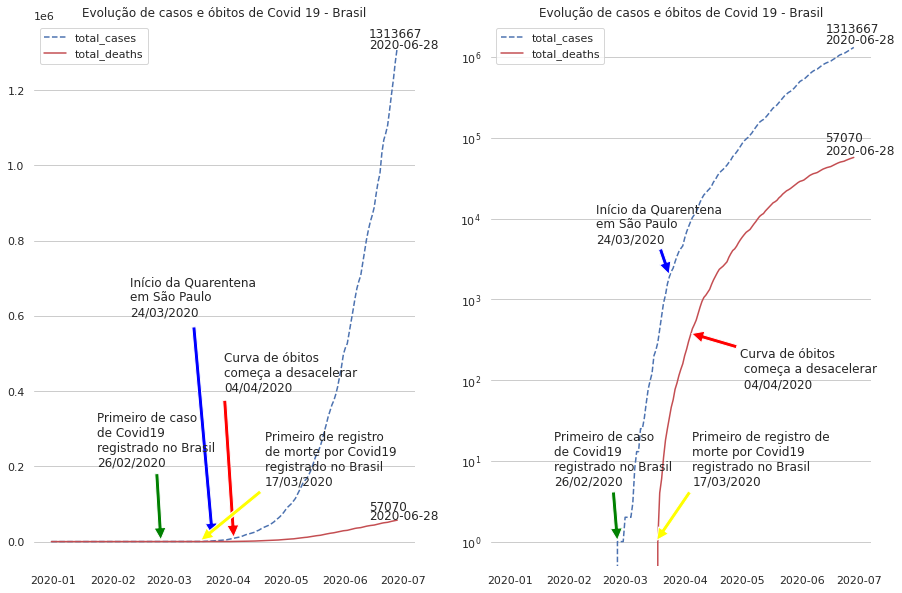

In [206]:
#criar gráfico

#Definir a última data do dataset
data_max = df_covid19['date'].max().date()

#parametros de adequação para as anotações no gráfico - quantitativos
x_grafico = data_max - timedelta(20)
x = [x_grafico, data_max, date_case_br, frist_date_db]

#últimos quantitativos para o total_case e total_deaths no dataset
y_tcb = int(df_covid19.loc[(df_covid19['date'] == str(data_max)) & (df_covid19['location'] == 'Brazil')]['total_cases'])
y_tdb = int(df_covid19.loc[(df_covid19['date'] == str(data_max)) & (df_covid19['location'] == 'Brazil')]['total_deaths'])
y_dcb = int(df_covid19.loc[(df_covid19['date'] == str(frist_date_cb)) & (df_covid19['location'] == 'Brazil')]['total_cases'])
y_ddb = int(df_covid19.loc[(df_covid19['date'] == str(frist_date_db)) & (df_covid19['location'] == 'Brazil')]['total_deaths'])

#configurações do gráfico
#sns.set_style='whitegrid'
sns.set(font='arial', style='whitegrid')

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(15,10))



#Gŕafico 01
ax[0].plot_date('date', 'total_cases', 'b--', data= total_brasil)
ax[0].plot_date('date', 'total_deaths', 'r', data = total_deathB)
ax[0].set_yscale('linear')
ax[0].set_title('Evolução de casos e óbitos de Covid 19 - Brasil')
ax[0].legend()

#anotação e seta
ax[0].annotate('Início da Quarentena\nem São Paulo\n24/03/2020', xy=(dt.datetime(2020,3 , 24), 2000),\
               xytext=(dt.datetime(2020,2 , 10), 6e5), arrowprops=dict(facecolor='blue', shrink=0.025))

ax[0].annotate('Curva de óbitos\ncomeça a desacelerar \n04/04/2020', xy=(dt.datetime(2020,4 , 4), 2000),\
               xytext=(dt.datetime(2020,3 , 30), 4e5), arrowprops=dict(facecolor='red', shrink=0.025))
#total_cases
ax[0].annotate(y_tcb, (mdates.date2num(x[0]), y_tcb),  
            xytext=(10,10), textcoords='offset points')

ax[0].annotate(str(x[1]), (mdates.date2num(x[0]), y_tcb-3e4),  
            xytext=(10,10), textcoords='offset points')

#total_deaths
ax[0].annotate(y_tdb, (mdates.date2num(x[0]), y_tdb),
            xytext=(10,10), textcoords='offset points')

ax[0].annotate(str(x[1]), (mdates.date2num(x[0]), y_tdb-2.5e4),  
            xytext=(10,10), textcoords='offset points')

#primeiro caso de covid19 no Brasil
ax[0].annotate('Primeiro de caso\nde Covid19\nregistrado no Brasil\n26/02/2020', xy=(dt.datetime(2020,2, 26), 1),\
               xytext=(dt.datetime(2020,1, 24), 2e5),arrowprops=dict(facecolor='green', shrink=0.025))

#primeiro caso de covid19 no Brasil
ax[0].annotate('Primeiro de registro\nde morte por Covid19\nregistrado no Brasil\n17/03/2020', xy=(dt.datetime(2020,3, 17), 1),\
               xytext=(dt.datetime(2020,4, 20), 1.5e5), arrowprops=dict(facecolor='yellow', shrink=0.025))

ax[0].grid(axis='x')



#Gŕafico 02
ax[1].plot_date('date', 'total_cases', 'b--', data= total_brasil)
ax[1].plot_date('date', 'total_deaths', 'r', data = total_deathB)
ax[1].set_yscale('log')
ax[1].set_title( 'Evolução de casos e óbitos de Covid 19 - Brasil')

ax[1].legend()

#anotação e seta
ax[1].annotate('Início da Quarentena\nem São Paulo\n24/03/2020', xy=(dt.datetime(2020,3 , 24), 2e3),\
               xytext=(dt.datetime(2020,2, 15), 5e3),arrowprops=dict(facecolor='blue', shrink=0.025))

ax[1].annotate('Curva de óbitos\n começa a desacelerar\n 04/04/2020', xy=(dt.datetime(2020,4 ,4), 3.8e2),\
               xytext=(dt.datetime(2020,4, 30), 80),arrowprops=dict(facecolor='red', shrink=0.025))
#total_cases
ax[1].annotate(y_tcb, (mdates.date2num(x[0]), y_tcb+2e5),  
            xytext=(10,10), textcoords='offset points')

ax[1].annotate(str(x[1]), (mdates.date2num(x[0]), y_tcb-2e5),  
            xytext=(10,10), textcoords='offset points')

#total_deaths
ax[1].annotate(y_tdb, (mdates.date2num(x[0]), y_tdb+1e4),
            xytext=(10,10), textcoords='offset points')

ax[1].annotate(str(x[1]), (mdates.date2num(x[0]), y_tdb-1e4),  
            xytext=(10,10), textcoords='offset points')


#primeiro caso de covid19 no Brasil
ax[1].annotate('Primeiro de caso\nde Covid19\nregistrado no Brasil\n26/02/2020', xy=(dt.datetime(2020,2, 26), 1), xytext=(dt.datetime(2020,1, 24), 5),
            arrowprops=dict(facecolor='green', shrink=0.025))

#primeiro caso de covid19 no Brasil
ax[1].annotate('Primeiro de registro de\nmorte por Covid19\nregistrado no Brasil\n17/03/2020', xy=(dt.datetime(2020,3, 17), 1), xytext=(dt.datetime(2020,4, 5), 5),
            arrowprops=dict(facecolor='yellow', shrink=0.025))




ax[1].grid(axis='x')


#retira os eixos da grade que cirunda o gráfico
sns.despine(left=True, bottom=True)

plt.show()

fig.savefig('covidBrasil.png', format='png', dpi=300)

#CONCLUSÃO

Vimos que as ferramentas adequadas para analisar um conjunto de dados são de extrema importância, pois fornecem a pesquisadores e cient subsídios para embasamento de suas análises.

No caso exposto, análise dos casos e óbitos de Covid19 no Brasil e no mundo, a representação gráfica reflete o comportamento da pandemia frente as ações das autoridades governamentais.